In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
df=pd.read_csv("Telco-Customer-Churn.csv")

The first 5 rows of data

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

There are 21 columns

In [5]:
df_columns = df.columns.tolist()

for column in df_columns:
    unique_values = df[column].unique()
    unique_count = len(unique_values)
    
    print(f"Column: {column}")
    print(f"Number of unique values: {unique_count}")
    print(f"Unique values: {unique_values}\n")

Column: customerID
Number of unique values: 7043
Unique values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

Column: gender
Number of unique values: 2
Unique values: ['Female' 'Male']

Column: SeniorCitizen
Number of unique values: 2
Unique values: [0 1]

Column: Partner
Number of unique values: 2
Unique values: ['Yes' 'No']

Column: Dependents
Number of unique values: 2
Unique values: ['No' 'Yes']

Column: tenure
Number of unique values: 73
Unique values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

Column: PhoneService
Number of unique values: 2
Unique values: ['No' 'Yes']

Column: MultipleLines
Number of unique values: 3
Unique values: ['No phone service' 'No' 'Yes']

Column: InternetService
Number of unique values: 3
Unique values: ['DSL' 'Fiber optic' 'No']

Colum

In [6]:
#data types and null count
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


as seen above the null count is zero meaning there are no null values in the dataset 

The data type of TotalCharges is in objects, we are converting them to numeric and 
avioding potential errors by using 'coerce'

In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


analysing the min, max and mean we can find out skewnwss of the distribution,
the skewness of total charges is left skewed (uneven distribution where majority of the points are left side)

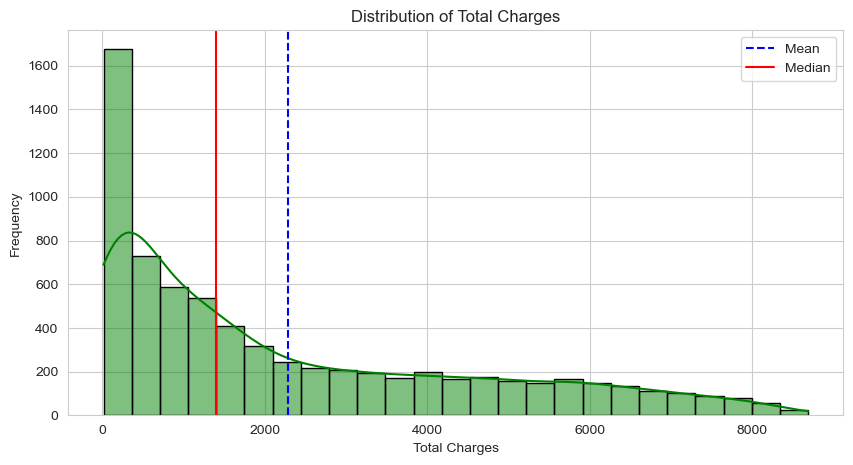

In [9]:
#distribution of totalcharges
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))

sns.histplot(df['TotalCharges'], kde=True, color='green', edgecolor='black')

mean_value = df['TotalCharges'].mean()
median_value = df['TotalCharges'].median()
plt.axvline(mean_value, color='blue', linestyle='--', label="Mean")
plt.axvline(median_value, color='red', linestyle='-', label='Median')

plt.title('Distribution of Total Charges')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')

plt.legend()
plt.show()


In [10]:
df.isnull().sum()


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
#we are droping missing values as there are only 11 datapoints missing
df=df.dropna()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

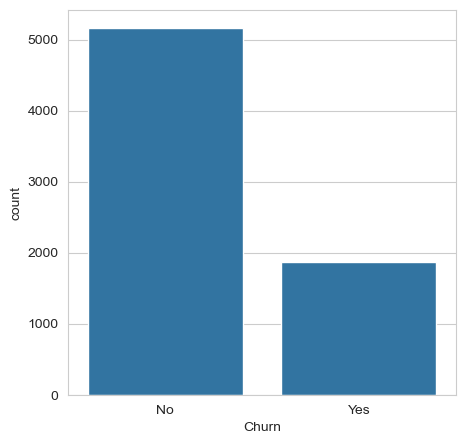

In [13]:

plt.figure(figsize=(5,5))
sns.countplot(x = df["Churn"])
plt.show()

/var/folders/b7/mp5qcyln1s773hcgklkfyq1c0000gn/T/ipykernel_94779/4216219711.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column, data=df, ax=ax[i], palette='viridis')
/var/folders/b7/mp5qcyln1s773hcgklkfyq1c0000gn/T/ipykernel_94779/4216219711.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column, data=df, ax=ax[i], palette='viridis')
/var/folders/b7/mp5qcyln1s773hcgklkfyq1c0000gn/T/ipykernel_94779/4216219711.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column, data=df, ax=ax[i], palette='viridis')
/var/folders/

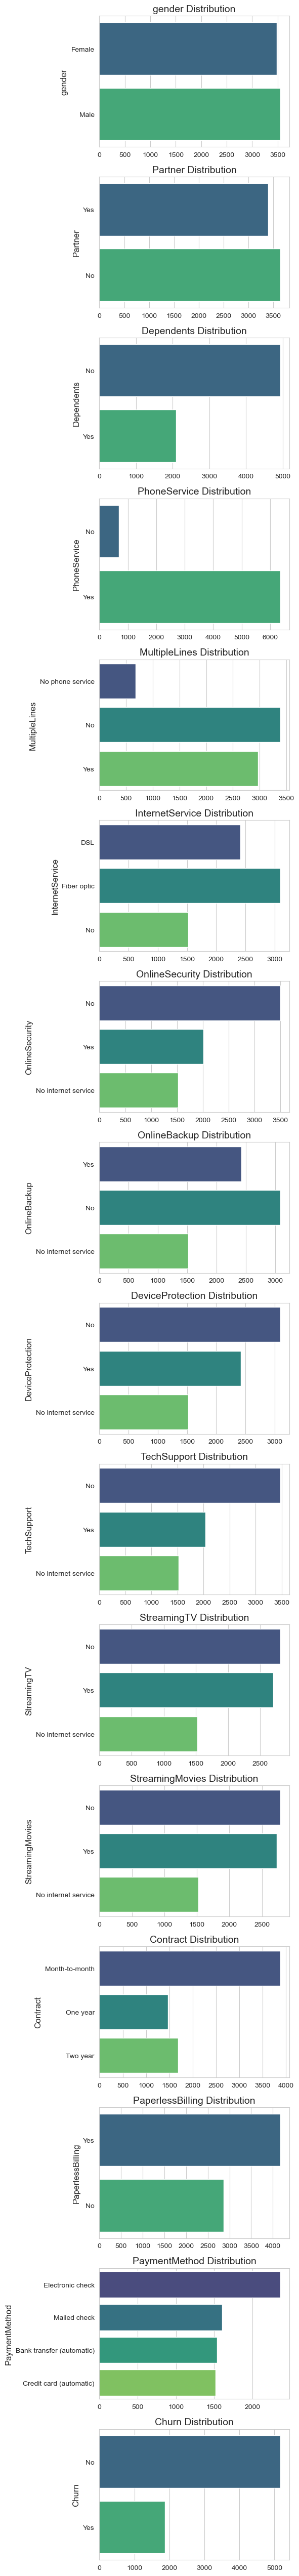

In [14]:

categorical_columns = df.select_dtypes(include=['object']).columns

fig, ax = plt.subplots(len(categorical_columns) - 1, 1, figsize=(6, 3 * len(categorical_columns)))

if len(categorical_columns) - 1 == 1:
    ax = [ax]

for i, column in enumerate([col for col in categorical_columns if col != 'customerID']):
    sns.countplot(y=column, data=df, ax=ax[i], palette='viridis')
    ax[i].set_title(f'{column} Distribution', fontsize=14)
    ax[i].set_xlabel('')
    ax[i].set_ylabel(column, fontsize=12)
    ax[i].tick_params(axis='y', labelsize=10)

plt.tight_layout()
plt.show()


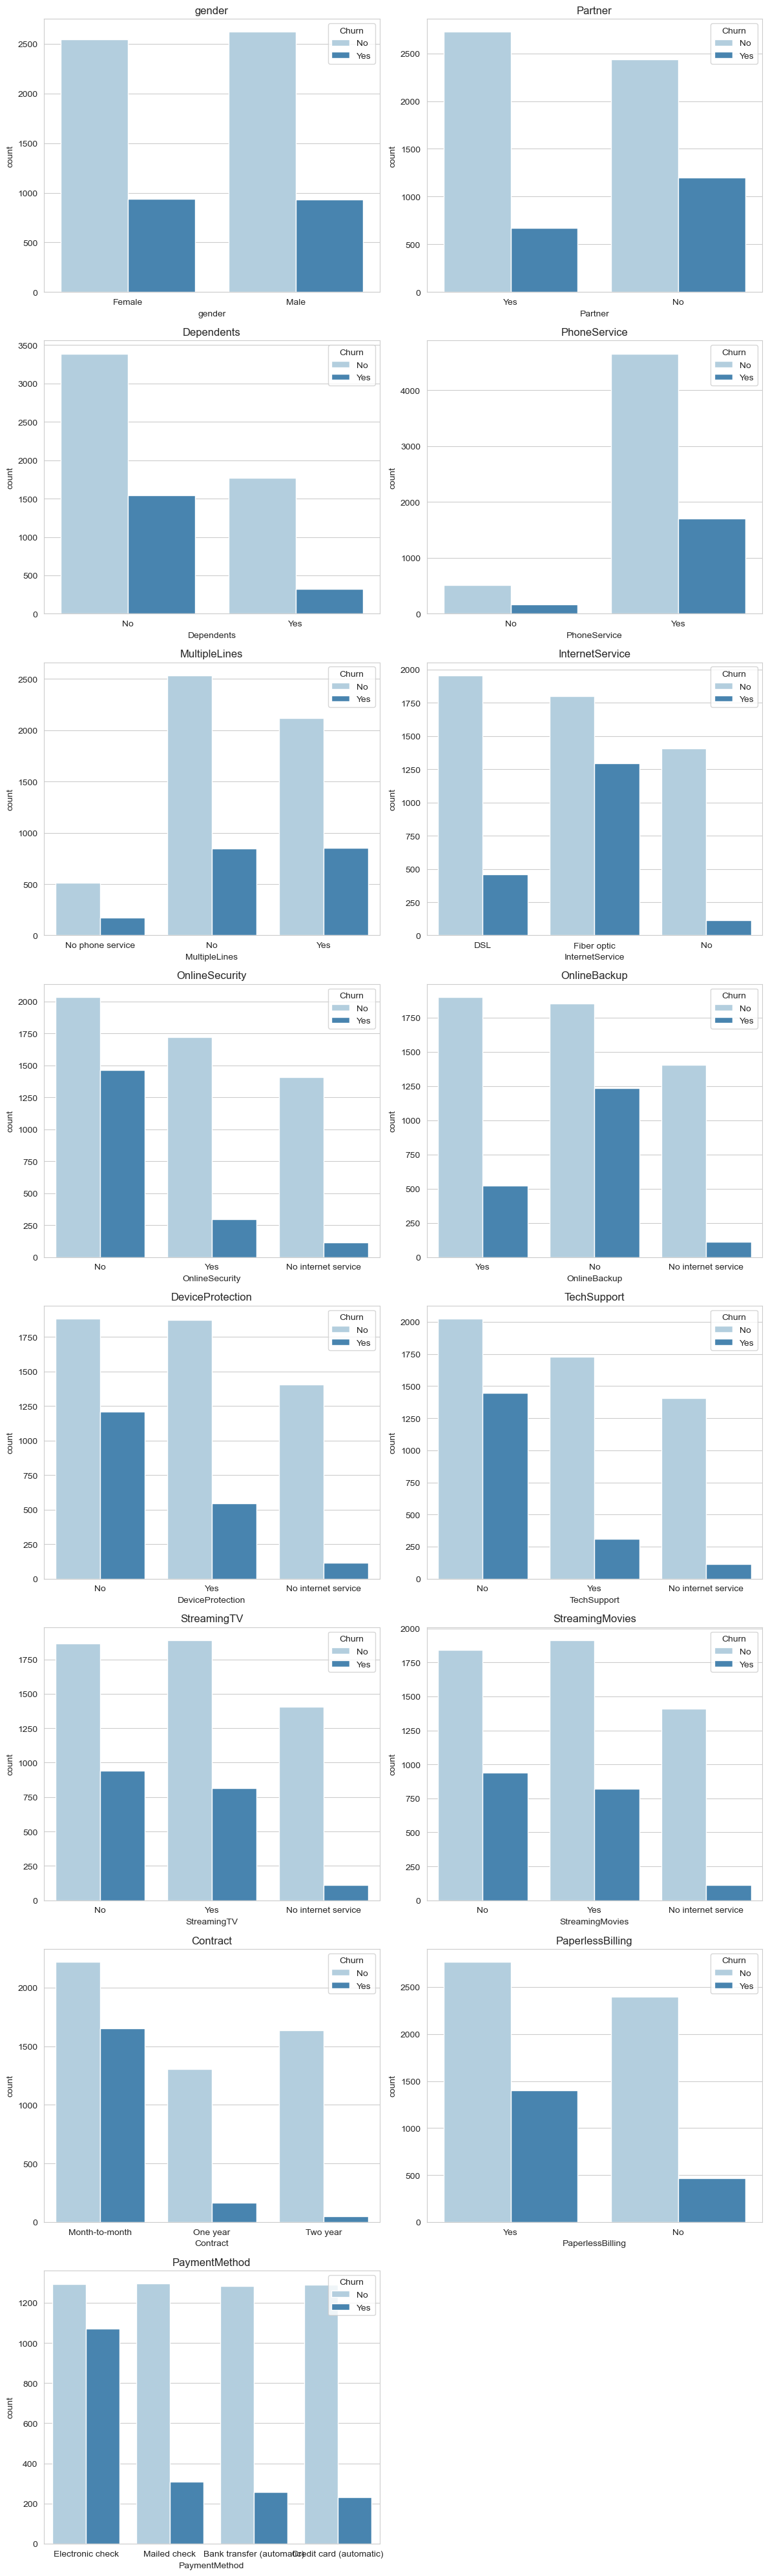

In [15]:

def plot_categorical_to_target(df, categorical_values, target):
    categorical_values = [col for col in categorical_values if df[col].dtype == 'object']
    
    number_of_columns = 2
    number_of_rows = math.ceil(len(categorical_values) / number_of_columns)
    
    fig = plt.figure(figsize=(12, 5 * number_of_rows))
    
    for index, column in enumerate(categorical_values, 1):
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)
        sns.countplot(x=column, data=df, hue=target, palette="Blues", ax=ax)
        ax.set_title(column)
    
    plt.tight_layout()
    plt.show()


customer_services = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                     'PhoneService', 'MultipleLines', 'InternetService',
                     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                     'TechSupport', 'StreamingTV', 'StreamingMovies',
                     'Contract', 'PaperlessBilling', 'PaymentMethod']

plot_categorical_to_target(df, customer_services, "Churn")


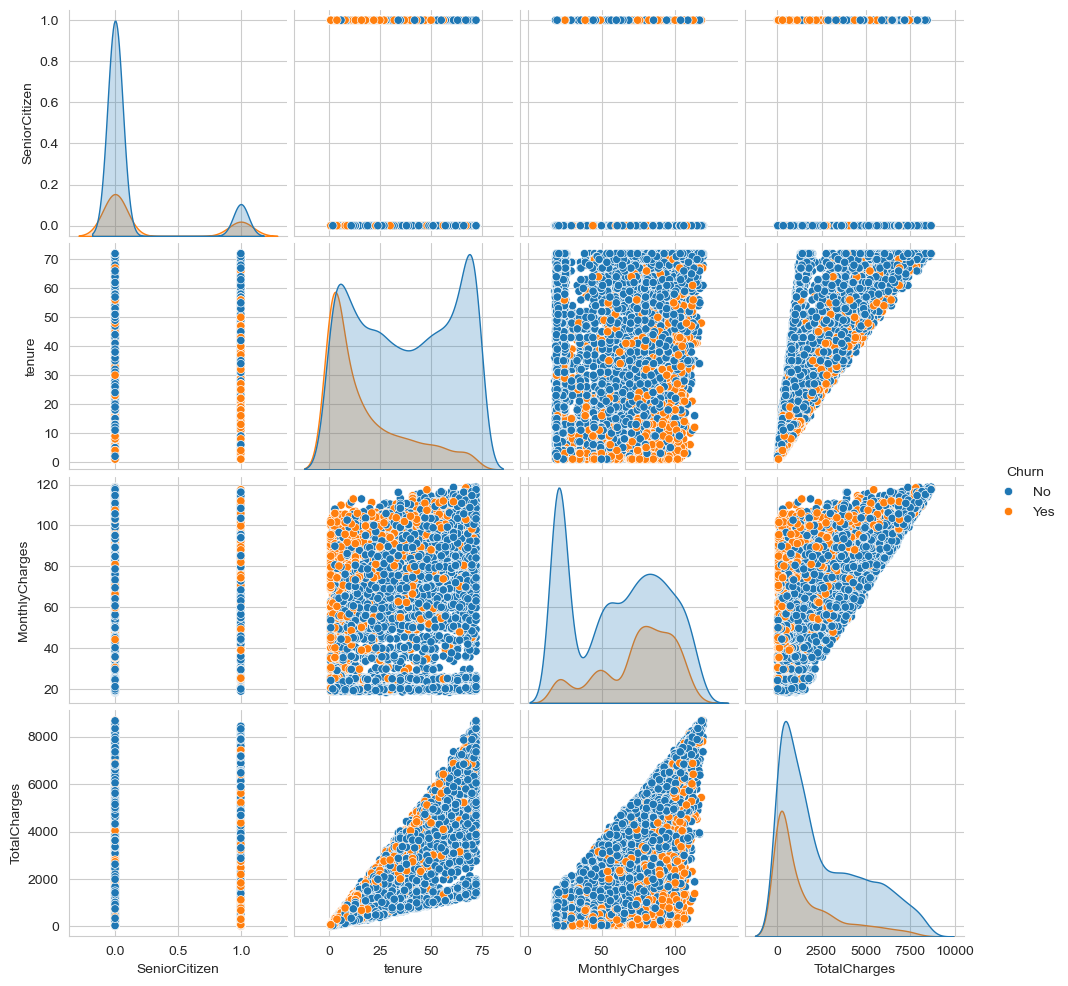

In [16]:
sns.pairplot(df, hue='Churn')
plt.show()

In [17]:
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


/var/folders/b7/mp5qcyln1s773hcgklkfyq1c0000gn/T/ipykernel_94779/604331133.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x = column, data = df, palette = "Blues")
/var/folders/b7/mp5qcyln1s773hcgklkfyq1c0000gn/T/ipykernel_94779/604331133.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x = column, data = df, palette = "Blues")
/var/folders/b7/mp5qcyln1s773hcgklkfyq1c0000gn/T/ipykernel_94779/604331133.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x = column, data = df, palette = "Blues")


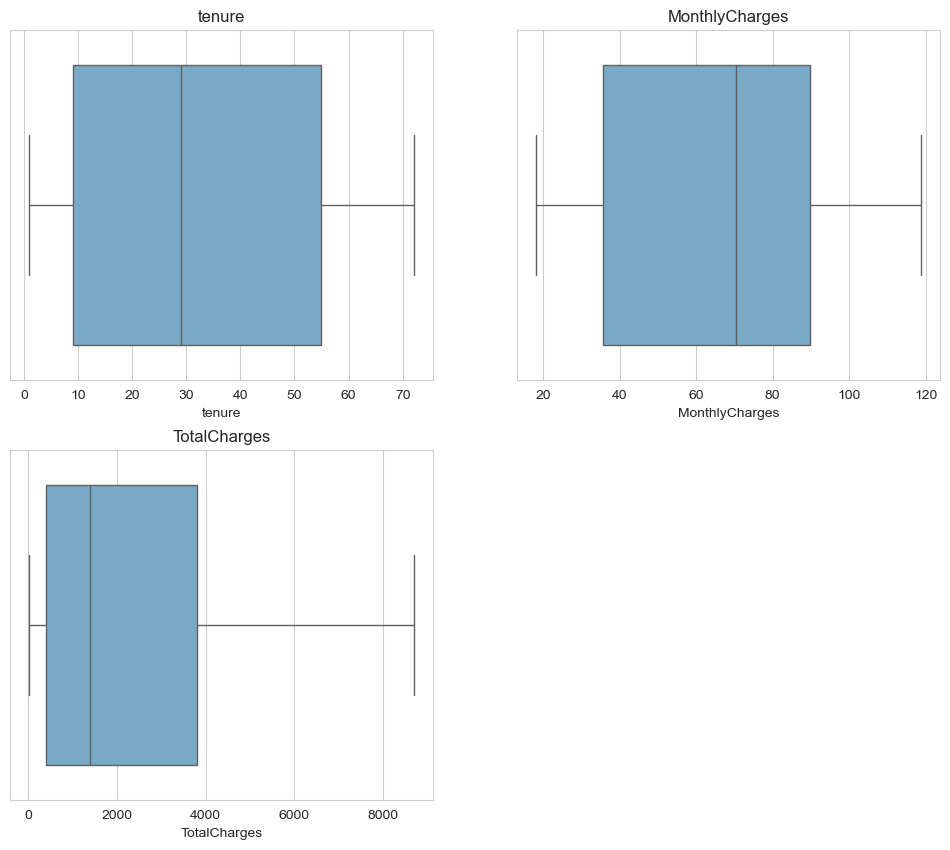

In [18]:
def outlier_check_boxplot(df,numerical_values):
    number_of_columns = 2
    number_of_rows = math.ceil(len(numerical_values)/2)
    
    fig = plt.figure(figsize=(12,5*number_of_rows))
    for index, column in enumerate(numerical_values, 1):
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)
        ax = sns.boxplot(x = column, data = df, palette = "Blues")
        ax.set_title(column)
    plt.savefig("Outliers_check.png", dpi=300)
    return plt.show()
numerical_values = ["tenure","MonthlyCharges","TotalCharges"]
outlier_check_boxplot(df,numerical_values)

In [19]:
df.to_csv('D01Pre_processed_telco_data.csv', index=False)


In [20]:
from sklearn.preprocessing import StandardScaler

categorical_columns = df.select_dtypes(include=['object']).columns.drop('customerID')  
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)  

scaler = StandardScaler()
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

print("Processed Data:")
print(df_encoded.head())
print("\n")

print("New DataFrame Information:")
print(df_encoded.info())
print("\n")



Processed Data:
   customerID  SeniorCitizen    tenure  MonthlyCharges  TotalCharges  \
0  7590-VHVEG              0 -1.280248       -1.161694     -0.994194   
1  5575-GNVDE              0  0.064303       -0.260878     -0.173740   
2  3668-QPYBK              0 -1.239504       -0.363923     -0.959649   
3  7795-CFOCW              0  0.512486       -0.747850     -0.195248   
4  9237-HQITU              0 -1.239504        0.196178     -0.940457   

   gender_Male  Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0        False         True           False             False   
1         True        False           False              True   
2         True        False           False              True   
3         True        False           False             False   
4        False        False           False              True   

   MultipleLines_No phone service  ...  StreamingTV_Yes  \
0                            True  ...            False   
1                           False  ...    

In [21]:
df_encoded.head(10)


,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,7590-VHVEG,0,-1.280248,-1.161694,-0.994194,False,True,False,False,True,...,False,False,False,False,False,True,False,True,False,False
1,5575-GNVDE,0,0.064303,-0.260878,-0.173740,True,False,False,True,False,...,False,False,False,True,False,False,False,False,True,False
2,3668-QPYBK,0,-1.239504,-0.363923,-0.959649,True,False,False,True,False,...,False,False,False,False,False,True,False,False,True,True
3,7795-CFOCW,0,0.512486,-0.747850,-0.195248,True,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
4,9237-HQITU,0,-1.239504,0.196178,-0.940457,False,False,False,True,False,...,False,False,False,False,False,True,False,True,False,True
5,9305-CDSKC,0,-0.995040,1.158489,-0.645369,False,False,False,True,False,...,True,False,True,False,False,True,False,True,False,True
6,1452-KIOVK,0,-0.424625,0.807802,-0.147313,True,False,True,True,False,...,True,False,False,False,False,True,True,False,False,False
7,6713-OKOMC,0,-0.913552,-1.165018,-0.874169,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
8,7892-POOKP,0,-0.180161,1.329677,0.336516,False,True,False,True,False,...,True,False,True,False,False,True,False,True,False,True
9,6388-TABGU,0,1.205134,-0.287470,0.531476,True,False,True,True,False,...,False,False,False,True,False,False,False,False,False,False


In [22]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_columns),
        ('cat', OneHotEncoder(drop='first'), categorical_columns)
    ])

df_processed = preprocessor.fit_transform(df)

new_categorical_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns)
new_column_names = numerical_columns + list(new_categorical_features)

df_processed = pd.DataFrame(df_processed, columns=new_column_names)

print("Processed Data:")
print(df_processed.head())
print("\n")

print("New DataFrame Information:")
print(df_processed.info())
print("\n")

df_encoded.to_csv('D02fully_processed_telco_data.csv', index=False)


Processed Data:
     tenure  MonthlyCharges  TotalCharges  gender_Male  Partner_Yes  \
0  0.000000        0.115423      0.001275          0.0          1.0   
1  0.464789        0.385075      0.215867          1.0          0.0   
2  0.014085        0.354229      0.010310          1.0          0.0   
3  0.619718        0.239303      0.210241          1.0          0.0   
4  0.014085        0.521891      0.015330          0.0          0.0   

   Dependents_Yes  PhoneService_Yes  MultipleLines_No phone service  \
0             0.0               0.0                             1.0   
1             0.0               1.0                             0.0   
2             0.0               1.0                             0.0   
3             0.0               0.0                             1.0   
4             0.0               1.0                             0.0   

   MultipleLines_Yes  InternetService_Fiber optic  ...  StreamingTV_Yes  \
0                0.0                          0.0  ... 

In [23]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_columns),
        ('cat', OneHotEncoder(drop='first'), categorical_columns)
    ])

df_processed = preprocessor.fit_transform(df)

new_categorical_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns)
new_column_names = numerical_columns + list(new_categorical_features)

df_processed = pd.DataFrame(df_processed, columns=new_column_names)

print("Processed Data:")
print(df_processed.head())
print("\n")

print("New DataFrame Information:")
print(df_processed.info())
print("\n")

df_processed.to_csv('D03Mainfully_processed_telco_data.csv', index=False)

print("Data preprocessing complete and saved to 'D03Mainfully_processed_telco_data.csv'.")

Processed Data:
     tenure  MonthlyCharges  TotalCharges  gender_Male  Partner_Yes  \
0  0.000000        0.115423      0.001275          0.0          1.0   
1  0.464789        0.385075      0.215867          1.0          0.0   
2  0.014085        0.354229      0.010310          1.0          0.0   
3  0.619718        0.239303      0.210241          1.0          0.0   
4  0.014085        0.521891      0.015330          0.0          0.0   

   Dependents_Yes  PhoneService_Yes  MultipleLines_No phone service  \
0             0.0               0.0                             1.0   
1             0.0               1.0                             0.0   
2             0.0               1.0                             0.0   
3             0.0               0.0                             1.0   
4             0.0               1.0                             0.0   

   MultipleLines_Yes  InternetService_Fiber optic  ...  StreamingTV_Yes  \
0                0.0                          0.0  ... 

In [24]:


df_processed = pd.read_csv('D02fully_processed_telco_data.csv')

print("First Few Rows of the Processed Data:")
print(df_processed.head())
print("\n")

print("Dataset Summary:")
print(df_processed.describe())
print("\n")

print("Data Information:")
print(df_processed.info())

First Few Rows of the Processed Data:
   customerID  SeniorCitizen    tenure  MonthlyCharges  TotalCharges  \
0  7590-VHVEG              0 -1.280248       -1.161694     -0.994194   
1  5575-GNVDE              0  0.064303       -0.260878     -0.173740   
2  3668-QPYBK              0 -1.239504       -0.363923     -0.959649   
3  7795-CFOCW              0  0.512486       -0.747850     -0.195248   
4  9237-HQITU              0 -1.239504        0.196178     -0.940457   

   gender_Male  Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0        False         True           False             False   
1         True        False           False              True   
2         True        False           False              True   
3         True        False           False             False   
4        False        False           False              True   

   MultipleLines_No phone service  ...  StreamingTV_Yes  \
0                            True  ...            False   
1                   

In [25]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

df_processed = pd.read_csv('D02fully_processed_telco_data.csv')

X = df_processed.drop(columns=['customerID', 'Churn_Yes'])

In [26]:
X = X.apply(pd.to_numeric, errors='coerce')

X = X.fillna(0)

pca = PCA(n_components=3)
df_reduced = pca.fit_transform(X)

selector = SelectKBest(f_classif, k=10)
df_selected = selector.fit_transform(X, df_processed['Churn_Yes'])

X_train, X_test, y_train, y_test = train_test_split(X, df_processed['Churn_Yes'], test_size=0.3, random_state=42)
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

print("After SMOTE, counts of label '1': {}".format(sum(y_res == 1)))
print("After SMOTE, counts of label '0': {}".format(sum(y_res == 0)))

After SMOTE, counts of label '1': 3614
After SMOTE, counts of label '0': 3614


In [27]:
sns.set(style="whitegrid")


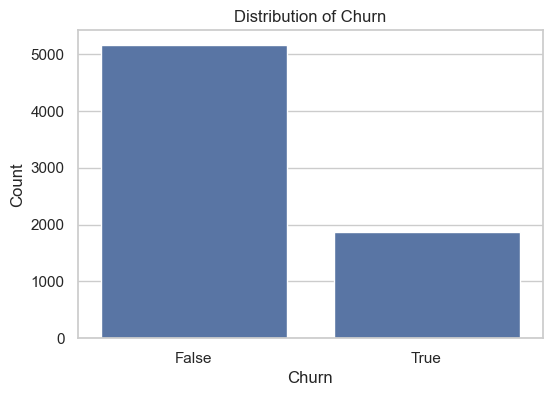

In [28]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn_Yes', data=df_processed)
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

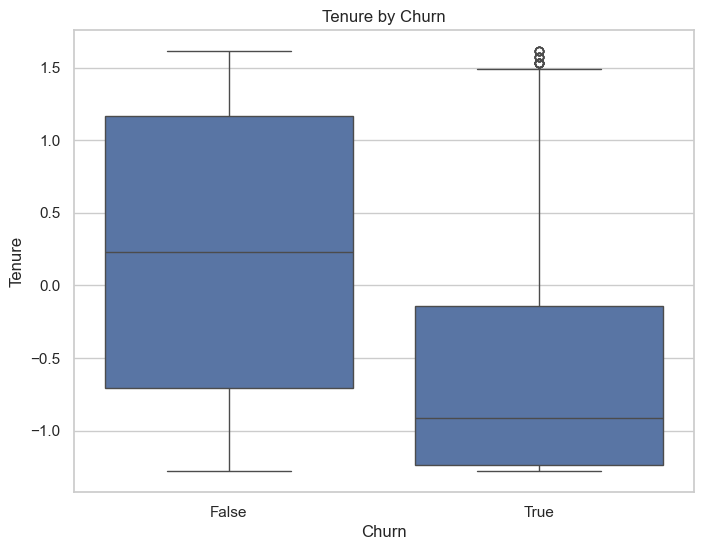

In [29]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn_Yes', y='tenure', data=df_processed)
plt.title('Tenure by Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.show()

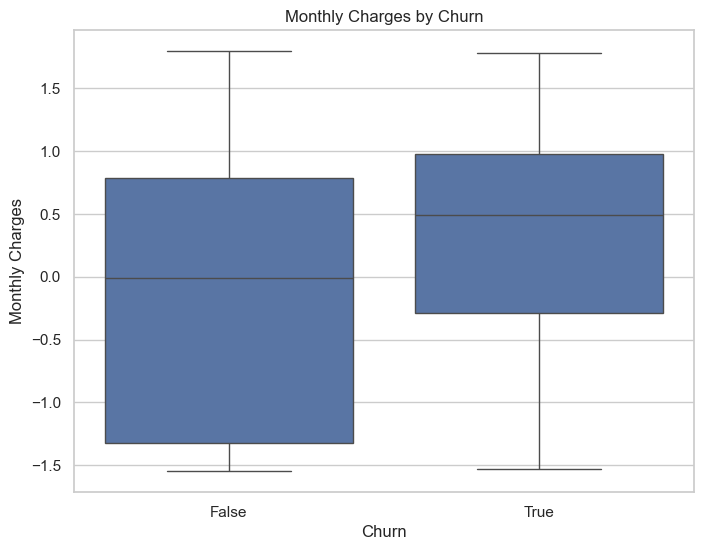

In [30]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn_Yes', y='MonthlyCharges', data=df_processed)
plt.title('Monthly Charges by Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

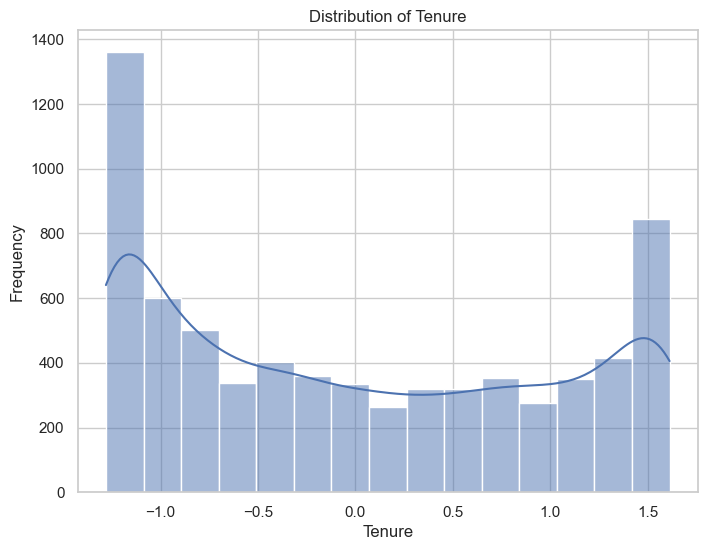

In [31]:
plt.figure(figsize=(8, 6))
sns.histplot(df_processed['tenure'], kde=True)
plt.title('Distribution of Tenure')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.show()

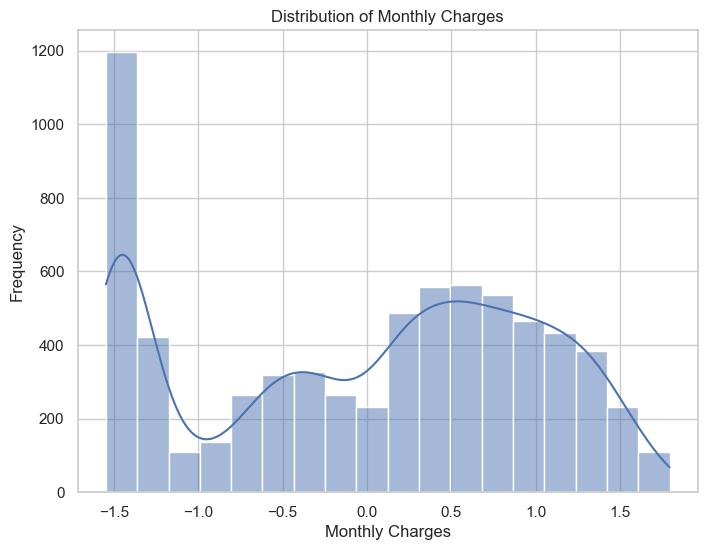

In [32]:
plt.figure(figsize=(8, 6))
sns.histplot(df_processed['MonthlyCharges'], kde=True)
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()

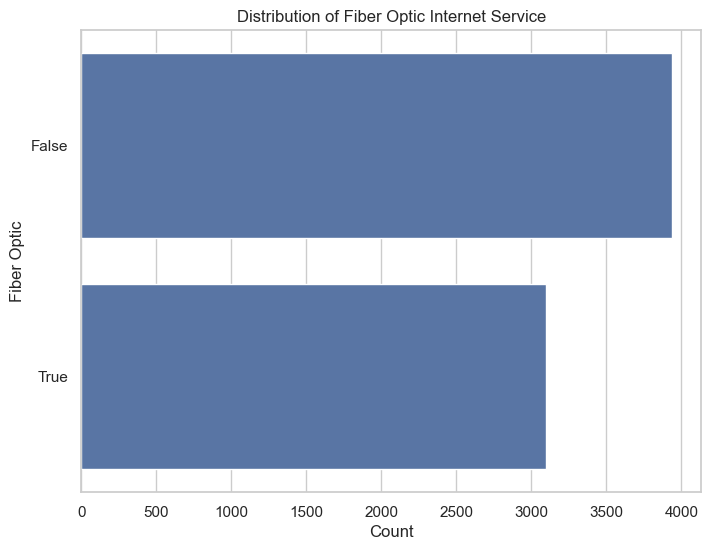

In [33]:
plt.figure(figsize=(8, 6))
sns.countplot(y='InternetService_Fiber optic', data=df_processed)
plt.title('Distribution of Fiber Optic Internet Service')
plt.xlabel('Count')
plt.ylabel('Fiber Optic')
plt.show()

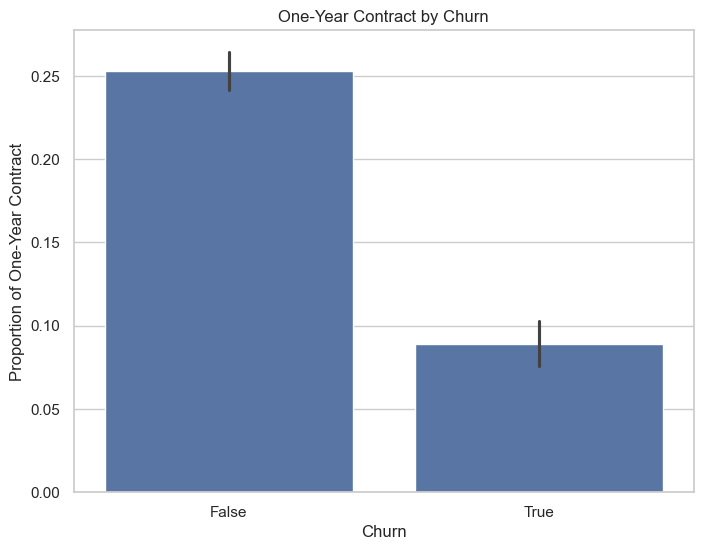

In [34]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Churn_Yes', y='Contract_One year', data=df_processed)
plt.title('One-Year Contract by Churn')
plt.xlabel('Churn')
plt.ylabel('Proportion of One-Year Contract')
plt.show()

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

df = pd.read_csv('D02fully_processed_telco_data.csv')

X = df.drop('Churn_Yes', axis=1)
y = df['Churn_Yes']

numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled = scaler.transform(X_test[numeric_cols])

imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train_scaled)
X_test_imputed = imputer.transform(X_test_scaled)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_imputed, y_train)

log_reg_predictions = log_reg.predict(X_test_imputed)
log_reg_accuracy = accuracy_score(y_test, log_reg_predictions)

print("Logistic Regression Accuracy:", log_reg_accuracy)
print(classification_report(y_test, log_reg_predictions))

Logistic Regression Accuracy: 0.7803837953091685
              precision    recall  f1-score   support

       False       0.82      0.91      0.86      1033
        True       0.62      0.44      0.51       374

    accuracy                           0.78      1407
   macro avg       0.72      0.67      0.69      1407
weighted avg       0.77      0.78      0.77      1407

